In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pickle
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.manifold import TSNE
from sklearn import preprocessing

np.set_printoptions(suppress=True)

In [2]:
# sns.reset_orig
import importlib
importlib.reload(plt); importlib.reload(sns)

<module 'seaborn' from '/home/kaka/p35_tf16_k205/lib/python3.5/site-packages/seaborn/__init__.py'>

In [3]:
sns.reset_orig()

/home/kaka/p35_tf16_k205/lib/python3.5/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/home/kaka/p35_tf16_k205/lib/python3.5/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [4]:
def save_obj_curr_folder(obj, name):
    with open(name, 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj_curr_folder(name):
    with open(name, 'rb') as f:
        return pickle.load(f)

In [7]:
from util.util_data import *

In [6]:
# pl_X = load_obj_curr_folder('data_pl_desc/pl_X.p')
# pl_Y_desc = load_obj_curr_folder('data_pl_desc/pl_Y_desc.p')
# pl_Y_title = load_obj_curr_folder('data_pl_desc/pl_Y_title.p')



FileNotFoundError: [Errno 2] No such file or directory: 'data_pl_desc/pl_X.p'

In [5]:
pl_X = np.array(pl_X)

In [6]:
pl_X.shape

(18760, 26)

In [58]:
std_pl_X = preprocessing.scale(pl_X, axis=0) 

In [62]:
std_pl_X[0]

array([ 0.76299574,  0.79342741, -0.42116335, -0.82826443, -0.46744253,
       -1.0754256 , -0.17647158, -0.75766247,  0.07050978, -0.70373644,
       -0.10961879, -0.16685067,  1.17448495, -0.01782352,  1.02434481,
       -0.44407006, -1.15906514,  0.70483631, -0.61232168,  1.26351278,
       -0.81933179,  0.89624595,  1.33397921,  1.66840684,  0.92186491,
        0.        ])

In [64]:
np.mean(std_pl_X[:, 10]), np.mean(std_pl_X[10, :])

(8.037132201178286e-13, -0.30146021970066755)

In [68]:
for _i in range(26):
    print(np.mean(std_pl_X[:, _i]))

5.57223066551311e-15
-3.761028446747226e-15
3.3996970128905435e-15
1.2551154145851918e-14
2.631962404475979e-15
1.0492246730291202e-14
-1.8112969072967693e-14
-1.2915515612696917e-15
1.5074035362748522e-14
1.9911861782718544e-14
8.037132201178286e-13
1.0844109311059397e-14
2.0157294454772137e-15
-1.94914447055897e-14
-4.7117012968313676e-15
-5.1249220456129616e-15
-4.574592304110069e-15
-1.5784956852632163e-14
1.162017651019183e-15
1.9697486948795186e-14
-3.3115419906367246e-14
1.7112111301514566e-15
-1.6665181435737957e-17
3.7117904106870906e-17
2.2725247412369942e-17
0.0


In [67]:
print(len(std_pl_X[:, 10]), len(std_pl_X[10, :]))

18760 26


In [69]:
A = std_pl_X
interia_ls = []
for k in range (1, 20):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(A)

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_

    # Sum of distances of samples to their closest cluster center
    interia = kmeans_model.inertia_
    interia_ls.append(interia)
    print("k:",k, " distance to closest centroid:", interia)


k: 1  distance to closest centroid: 468999.99999999994
k: 2  distance to closest centroid: 387641.82951136504
k: 3  distance to closest centroid: 357084.8974179473
k: 4  distance to closest centroid: 330367.84729641967
k: 5  distance to closest centroid: 308606.3386381082
k: 6  distance to closest centroid: 289682.6716915468
k: 7  distance to closest centroid: 278591.1516667612
k: 8  distance to closest centroid: 268867.45582871547
k: 9  distance to closest centroid: 260718.1034849374
k: 10  distance to closest centroid: 254287.59606673932
k: 11  distance to closest centroid: 248701.71540491216
k: 12  distance to closest centroid: 243285.4536030041
k: 13  distance to closest centroid: 238265.38578002682
k: 14  distance to closest centroid: 233673.36438753246
k: 15  distance to closest centroid: 229864.99629608894
k: 16  distance to closest centroid: 226683.34674893215
k: 17  distance to closest centroid: 223712.22566905906
k: 18  distance to closest centroid: 220759.55209059367
k: 19  

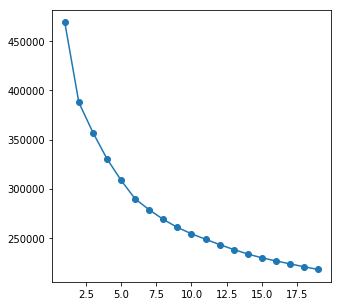

In [111]:
plt.figure(figsize=(5,5))
plt.scatter(range(1, 20), interia_ls);
plt.plot(range(1, 20), interia_ls);

In [ ]:
# we choose k = 6

In [73]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_pl_X = tsne.fit_transform(std_pl_X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 18760 samples in 0.017s...
[t-SNE] Computed neighbors for 18760 samples in 12.859s...
[t-SNE] Computed conditional probabilities for sample 1000 / 18760
[t-SNE] Computed conditional probabilities for sample 2000 / 18760
[t-SNE] Computed conditional probabilities for sample 3000 / 18760
[t-SNE] Computed conditional probabilities for sample 4000 / 18760
[t-SNE] Computed conditional probabilities for sample 5000 / 18760
[t-SNE] Computed conditional probabilities for sample 6000 / 18760
[t-SNE] Computed conditional probabilities for sample 7000 / 18760
[t-SNE] Computed conditional probabilities for sample 8000 / 18760
[t-SNE] Computed conditional probabilities for sample 9000 / 18760
[t-SNE] Computed conditional probabilities for sample 10000 / 18760
[t-SNE] Computed conditional probabilities for sample 11000 / 18760
[t-SNE] Computed conditional probabilities for sample 12000 / 18760
[t-SNE] Computed conditional probabilities for s

In [74]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(std_pl_X)
y_kmeans = kmeans.predict(std_pl_X)

In [83]:
centers = kmeans.cluster_centers_

In [84]:
centers.shape

(6, 26)

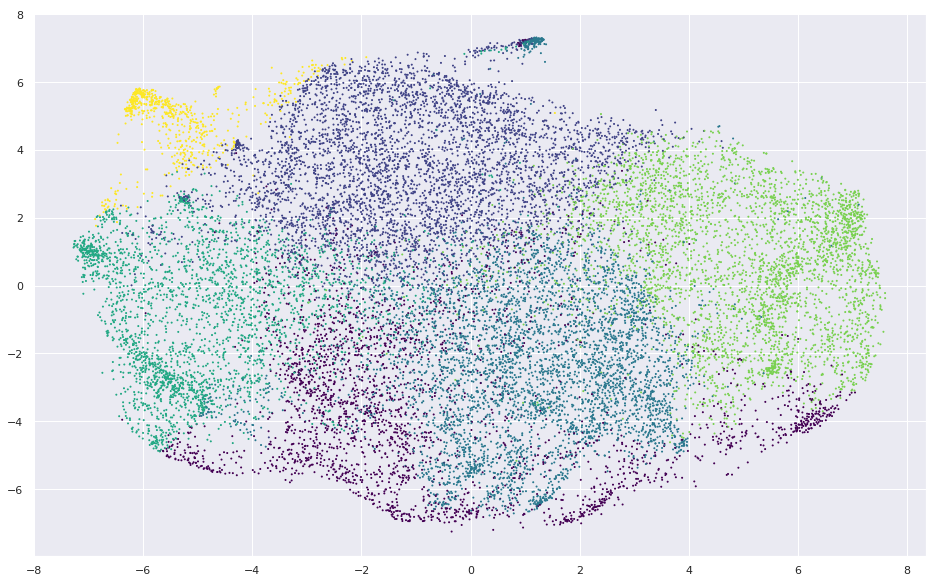

In [75]:
plt.figure(figsize=(16,10))
plt.scatter(tsne_pl_X[:, 0], tsne_pl_X[:, 1], c=y_kmeans, s=1, cmap='viridis')

In [76]:
k_spec = 10
spec_model = SpectralClustering(n_clusters=k_spec, affinity='nearest_neighbors', assign_labels='kmeans')
spec_labels = spec_model.fit_predict(std_pl_X)

In [77]:
len(spec_labels)

18760

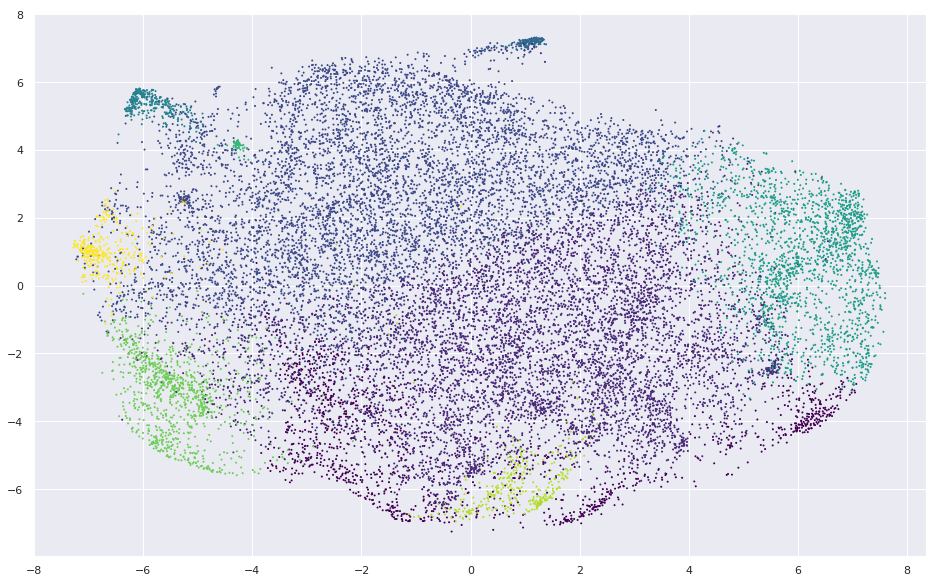

In [78]:
plt.figure(figsize=(16,10))
plt.scatter(tsne_pl_X[:, 0], tsne_pl_X[:, 1], c=spec_labels,
            s=1, cmap='viridis');

In [38]:
len(y_kmeans)

18760

In [87]:
clustered_titles = [[] for _ in range(6)]
clustered_descriptions = [[] for _ in range(6)]
for _idx in range(len(y_kmeans)):
    curr_label = y_kmeans[_idx]
    clustered_titles[curr_label].append(pl_Y_title[_idx])
    clustered_descriptions[curr_label].append(pl_Y_desc[_idx])
    

In [88]:
for _i in range(len(clustered_descriptions)):
    print(len(clustered_descriptions[_i]))

2633
4503
4518
2810
3636
660


In [89]:
print(clustered_descriptions[-1])

['The best from the movies', '(listen in order not on shuffle)', 'I grew older. I saw it in a dream.', 'From my catalogue, tracks to dance to!', 'instrumentals', 'Songs for a poor lonesome cowboy.', 'Immerse yourself into Westeros, Middle Earth, and the world of Pirates of the Carribbean as you study for homework, midterms, and finals.', 'I use this playlist when I do studious stuff I guess.', 'cute', '2017', 'warm n fuzzy', 'Instrumental Worship music -- Piano and Guitar, gospel and contemporary worship.', 'Warning: Chills may follow.', 'soundtracks from all blockbuster hit movies', 'get work done but also get work done while listening to some nice tunes', 'some songs to help you focus - credits to lovely suggestions', 'Music to listen too when planning a castle raid or killing a great dragon!!!', 'Motivation to finish exams, studying, yardwork, etc. 10+ years of curating and 20+ years of watching movies/TV shows have gone into this playlist. Please enjoy and message me any recommenda

In [90]:
centers

array([[ 0.07680886, -0.41079258,  0.21749473,  0.40548636, -0.17298816,
         0.06772523,  0.38202405,  0.01216539,  0.1413856 ,  0.22507609,
         0.09067348,  0.32638246, -0.11604584,  0.11493757,  0.0051719 ,
         0.01445683,  0.1826938 , -0.20082662,  0.19563475,  0.00698619,
         0.30587787, -0.00304622,  1.80673221,  1.77457228,  1.66679174,
         0.        ],
       [-0.25082455,  0.7607265 , -0.48844614, -0.74231172,  0.14031292,
        -0.60034755, -0.38516686, -0.49185623, -0.43515144, -0.7122431 ,
         0.36633049, -0.02057935,  0.9654681 ,  0.23133096,  0.6378268 ,
         0.40594223, -0.569387  ,  0.40399659, -0.37125948,  0.19450981,
        -0.24201257, -0.198964  , -0.3599305 , -0.28876709, -0.37493805,
         0.        ],
       [-0.0974439 , -0.7853911 ,  0.0444028 ,  0.93106681, -0.17784178,
         0.34997068,  0.74448552, -0.28865979,  0.50403759,  0.35958722,
         0.25822826,  0.07651075, -0.83850403, -0.6167206 , -0.70630735,
       

In [94]:
feature_name_list = [
    'popularity avg',
    'acousticness avg',
    'danceability avg',
    'energy avg',
    'instrumentalness avg',
    'liveness avg',
    'loudness avg',
    'speechiness avg',
    'tempo avg',
    'valence avg',
    'album release year avg',

    'popularity var',
    'acousticness var',
    'danceability var',
    'energy var',
    'instrumentalness var',
    'liveness var',
    'loudness var',
    'speechiness var',
    'tempo var',
    'valence var',
    'album release year var',

    'num_albums',
    'num_artists',
    'num_tracks',
    'collaborative'
]


In [95]:
len(feature_name_list)

26

In [97]:
for _i in range(6):
    print('Center no.', _i)
    for _j in range(26):
        print(feature_name_list[_j], ':', centers[_i][_j], end=' / ')
    print('\n\n')

Center no. 0
popularity avg : 0.07680885921739002 / acousticness avg : -0.41079258488507003 / danceability avg : 0.21749472572735495 / energy avg : 0.40548636141039474 / instrumentalness avg : -0.17298815991818828 / liveness avg : 0.06772522666768387 / loudness avg : 0.38202405240989873 / speechiness avg : 0.012165388429926519 / tempo avg : 0.1413856009740092 / valence avg : 0.2250760942536259 / album release year avg : 0.09067347976032612 / popularity var : 0.32638245778909764 / acousticness var : -0.11604584469029738 / danceability var : 0.11493756966496613 / energy var : 0.005171902964804737 / instrumentalness var : 0.01445683323051501 / liveness var : 0.18269380401929286 / loudness var : -0.20082661518850414 / speechiness var : 0.19563475383401402 / tempo var : 0.006986186670086137 / valence var : 0.30587786972677244 / album release year var : -0.0030462234323478834 / num_albums : 1.8067322137886 / num_artists : 1.7745722793361822 / num_tracks : 1.666791735469327 / collaborative : 

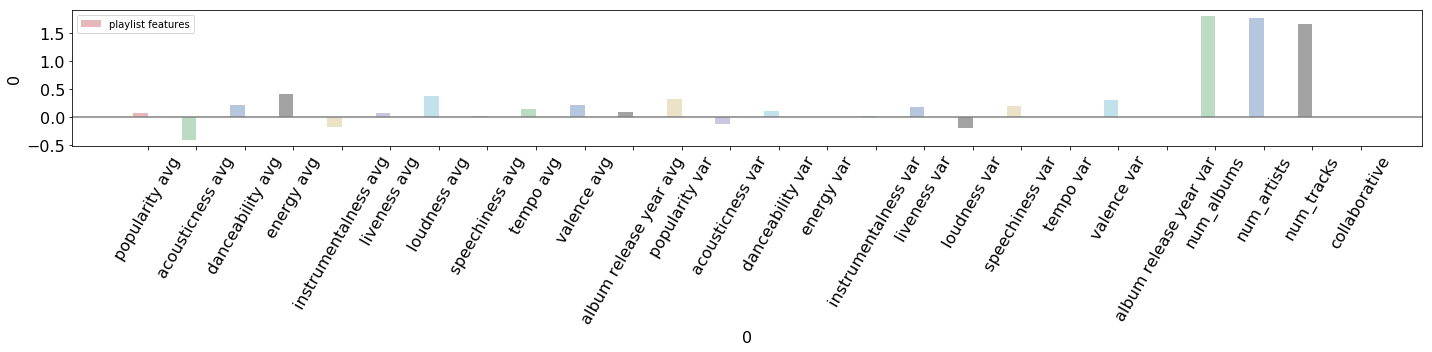

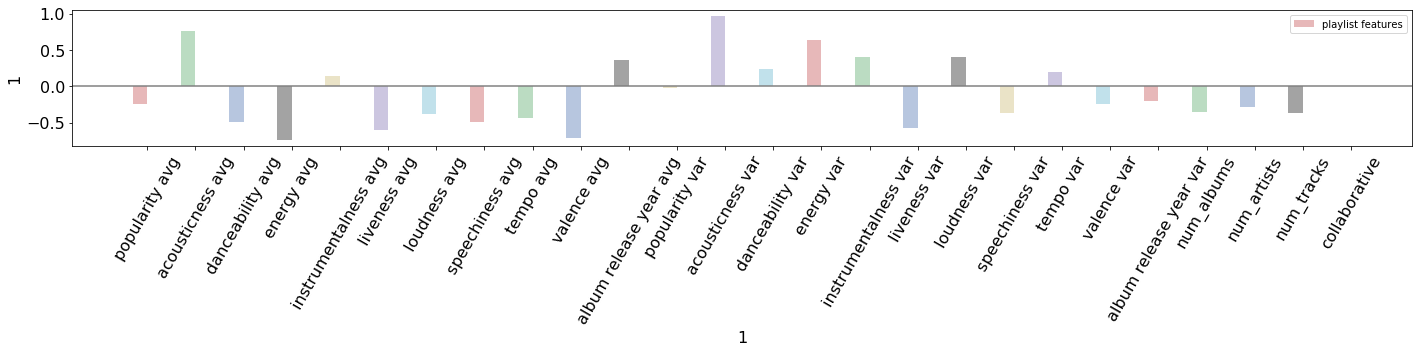

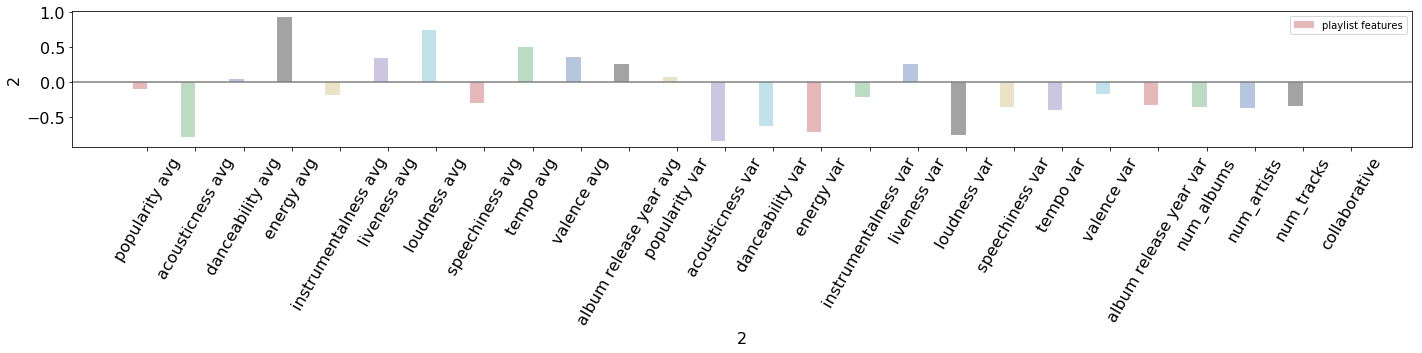

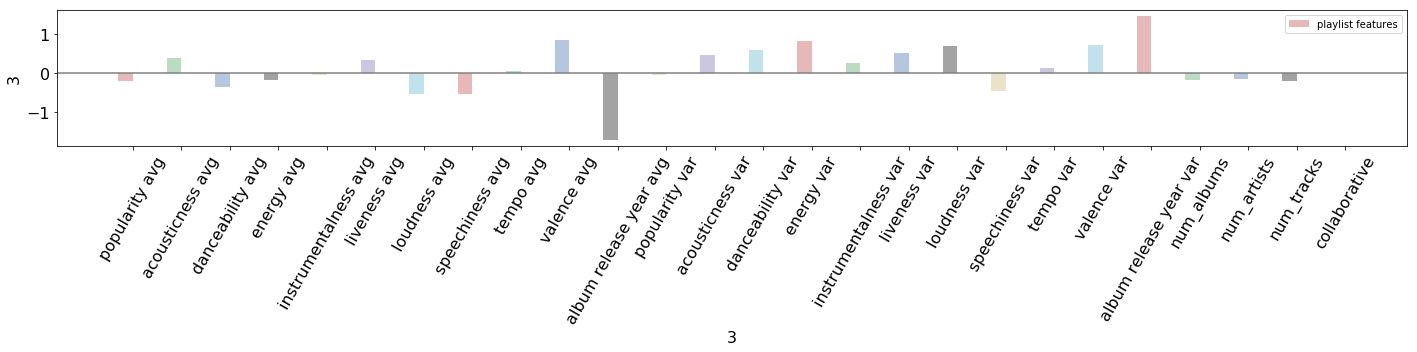

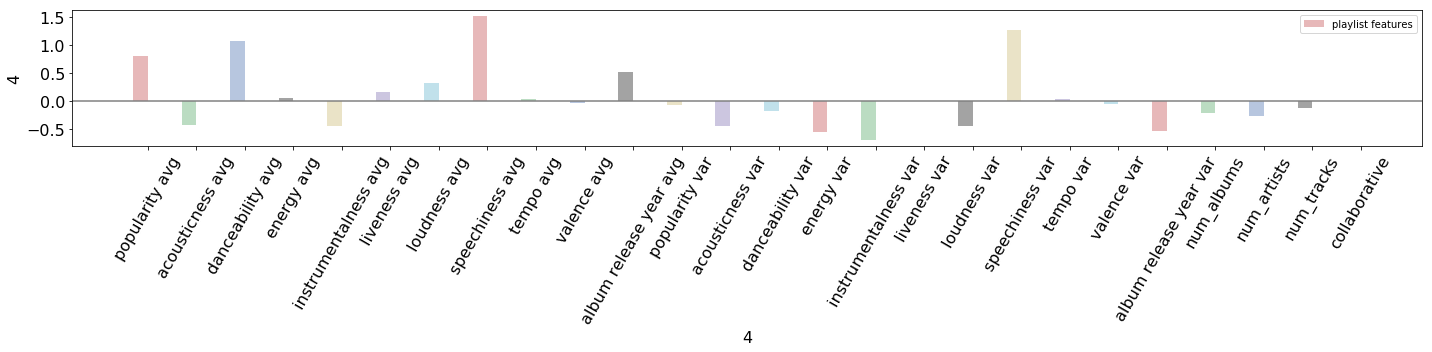

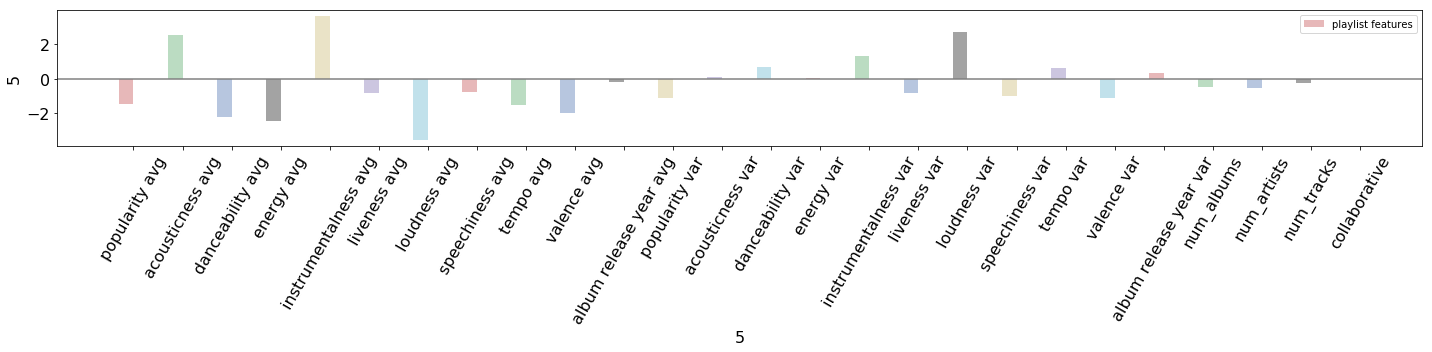

In [137]:
for c_idx in range(len(centers)):
    
    x = centers[c_idx]
    n_groups = len(feature_name_list)

    
    fig, ax = plt.subplots(figsize=(20, 5))
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(16)

    index = np.arange(n_groups)
    bar_width = 0.30

    opacity = 0.4
    error_config = {'ecolor': '0.3'}

    
    rects1 = ax.bar(index, x, bar_width,
                    alpha=opacity, color='rgbkymc', 
                    error_kw=error_config,
                    label='playlist features')
    ax.axhline(0, color='gray')
    
    

    ax.set_xlabel(str(c_idx))
    ax.set_ylabel(str(c_idx))
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(feature_name_list, rotation=60)
    ax.legend()
    fig.tight_layout()
    plt.savefig(str(c_idx) + '.png')


In [114]:
def kmeans_attr(_x, n_c=4):
    _km = KMeans(n_clusters=n_c)
    _km.fit(_x)
    return _km, _km.predict(_x), _km.cluster_centers_

In [115]:
def get_clustered_title_and_description(_clustered_x, num_cluster=20, pl_Y_title=pl_Y_title, pl_Y_desc=pl_Y_desc):
    clustered_titles = [[] for _ in range(num_cluster)]
    clustered_descriptions = [[] for _ in range(num_cluster)]
    for _idx in range(len(_clustered_x)):
        curr_label = _clustered_x[_idx]
        clustered_titles[curr_label].append(pl_Y_title[_idx])
        clustered_descriptions[curr_label].append(pl_Y_desc[_idx])
    return clustered_titles, clustered_descriptions

In [116]:
std_pl_X_var = std_pl_X[:, 11:]
std_pl_X_var_km_model, std_pl_X_var_km_y, std_pl_X_var_km_centers = kmeans_attr(std_pl_X_var, 6)
ct_std_pl_X_var, cd_std_pl_X_var = get_clustered_title_and_description(std_pl_X_var_km_y)

In [117]:
print(np.unique(std_pl_X_var_km_y, return_counts=True))

(array([0, 1, 2, 3, 4, 5], dtype=int32), array([3264, 3205, 4424, 2606, 3053, 2208]))


In [118]:
len(cd_std_pl_X_var)

20

In [119]:
print(std_pl_X_var_km_centers)

[[ 0.2145069   0.32182524  0.27941162  0.53309581 -0.02683851  0.44124214
   0.23616901 -0.46704344 -0.04774765  0.50877461  0.90967052 -0.26259318
  -0.24651549 -0.30782119  0.        ]
 [ 0.25140193 -0.11366766  0.08063503 -0.01666109 -0.0244126   0.18395513
  -0.14960729  0.1788215   0.02696861  0.21093728 -0.00348225  1.74466052
   1.66283832  1.65683585  0.        ]
 [ 0.11295777 -0.32711265 -0.01970292 -0.45999774 -0.56304113 -0.02130138
  -0.47863035  1.00257274  0.19637172  0.02758312 -0.52061843 -0.26196968
  -0.27209336 -0.21417896  0.        ]
 [-0.16896848  0.72212899 -0.1859373   0.34674304  0.22782268 -0.92313719
   0.48389536 -0.80169781  0.20131433 -1.07923037 -0.21435808 -0.54129121
  -0.50797021 -0.55016502  0.        ]
 [-0.12795424 -1.11516749 -1.02271708 -1.05603624 -0.25933489  0.21426294
  -0.83572242 -0.30224606 -0.83866503 -0.45681586 -0.4667844  -0.47017021
  -0.4912364  -0.47025218  0.        ]
 [-0.53141936  1.03386713  1.14309072  1.20832626  1.29183311 -0.

In [120]:
print(std_pl_X_var_km_centers[0])
print(cd_std_pl_X_var[0])

[ 0.2145069   0.32182524  0.27941162  0.53309581 -0.02683851  0.44124214
  0.23616901 -0.46704344 -0.04774765  0.50877461  0.90967052 -0.26259318
 -0.24651549 -0.30782119  0.        ]
['What I listen to crusing on my motorcycle', '&lt;Insert catchy description here&gt;', "Denis says, &quot;Listen to Beatles, and you won't regret it!&quot;", 'inspired heavily by Big Little Lies lol', 'I wrote a song for you and it was called yellow', 'You know who you are', 'this is callieween, this is callieween', 'I love you', "he's got a still small voice. you better be quiet.", '#ObnoxiousName', 'Songs for the Revolution', 'Happy, uplifting, turn your bad day around music.', '(to lazy to make more playlists)', 'catchin you in the romantic feels', 'this is actually super gay idk', 'Give a little listen, see the world from my eyes...', 'Just for driving', 'Sunny day playlist. Jump in your convertible and jam', 'Mulholland Drive', 'Grateful Dead and Jerry Garcia side projects', 'to play at max volume w

In [57]:
print(km_danceability_centers[-6])
print(ct_danceability[-6])

[0.80831269]
['hit it', 'lit', 'lit', "it's lit", 'get hype', 'aux', 'hype', '⚡️', 'old skool', '10 10', 'hyphy', "rapper's delight", 'baller', 'title', 'sauce', 'house', 'shake', 'berlin', 'pregame', 'blow', 'heavy rotation', 'rap', 'get crunk', 'funk', 'party playlist', 'dumb lit', 'ratchet', 'school', 'roots', 'party people', 'underground', 'tu', 'booty', 't r a p', 'funk', 'drive by', 'fire', 'bus', 'express yourself', 'ho ho ho', "it's a trap", 'compton', 'loud', 'fire🔥', 'grind', 'ummm', 'loud', 'trashy', '21 savage', "groovin'", '¯\\ ツ ¯', 'the playlist', 'bumping', 'yay area', 'bachata', 'savage mode', 'rn', 'hazy', 'yay area', 'old school rap', 'mosh', 'dirty south', 'booty', 'heat', 'bachata', 'ass', 'beastmode', "it's lit", 'hype', 'skrt', 'old school', 'g-funk', 'lit', 'h y p e', 'tb', 'orishas', 'rap mix', 'party music', 'rap', 'gangsta', 'hoe', 'boi', 'new new', 'slap', 'nwa', 'clouds', 'dank', 'old school', 'fuego', "bumpin'", 'party playlist', 'issa playlist', 'lit song

In [121]:
print(ct_std_pl_X_var[0])

['cruisin', "john's playlist", 'beatles', 'april showers', 'lighthouse', 'songs that remind me of you', 'oct 17', 'grandpa', 'jesus jamz', 'throwbackthursday', 'revolution', "don't worry be happy", 'luna', 'amor', 'for you', 'gaming playlist', 'drive', 'yeah baby', 'june', 'grateful dead', "summer '17", 'sunday', 'indie', 'not rap', 'best of bowie', 'chill out', 'oldies but goodies', 'autumn', 'focus', 'feels', 'xoxo', 'drive', 'special songs', 'showtunes', 'mellow vibes', "60's", 'tasty jams', 'aimee', 'in the summertime', 'tb', 'summer', "megan's playlist", 'christmas', 'feel good', 'christmas', 'hope', 'work jamz', 'best', 'for mom', 'march madness', 'navidad', 'oct17', 'oldies but goodies', 'salon', 'mixtape 1', 'old stuff', "60's", 'lost', "feelin' good", 'reggae', '<3', 'relaxed', 'baseball', '70s', 'yay', 'christmas', 'alli', 'my favorites', 'wedding music', 'for u', 'tis the season', 'the one', 'psychadelic', 'dad jams', 'summer', 'olive', 'classic oldies', 'edgy', 'sail', 'gui

In [122]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_pl_X_var = tsne.fit_transform(std_pl_X_var)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 18760 samples in 0.012s...
[t-SNE] Computed neighbors for 18760 samples in 8.016s...
[t-SNE] Computed conditional probabilities for sample 1000 / 18760
[t-SNE] Computed conditional probabilities for sample 2000 / 18760
[t-SNE] Computed conditional probabilities for sample 3000 / 18760
[t-SNE] Computed conditional probabilities for sample 4000 / 18760
[t-SNE] Computed conditional probabilities for sample 5000 / 18760
[t-SNE] Computed conditional probabilities for sample 6000 / 18760
[t-SNE] Computed conditional probabilities for sample 7000 / 18760
[t-SNE] Computed conditional probabilities for sample 8000 / 18760
[t-SNE] Computed conditional probabilities for sample 9000 / 18760
[t-SNE] Computed conditional probabilities for sample 10000 / 18760
[t-SNE] Computed conditional probabilities for sample 11000 / 18760
[t-SNE] Computed conditional probabilities for sample 12000 / 18760
[t-SNE] Computed conditional probabilities for sa

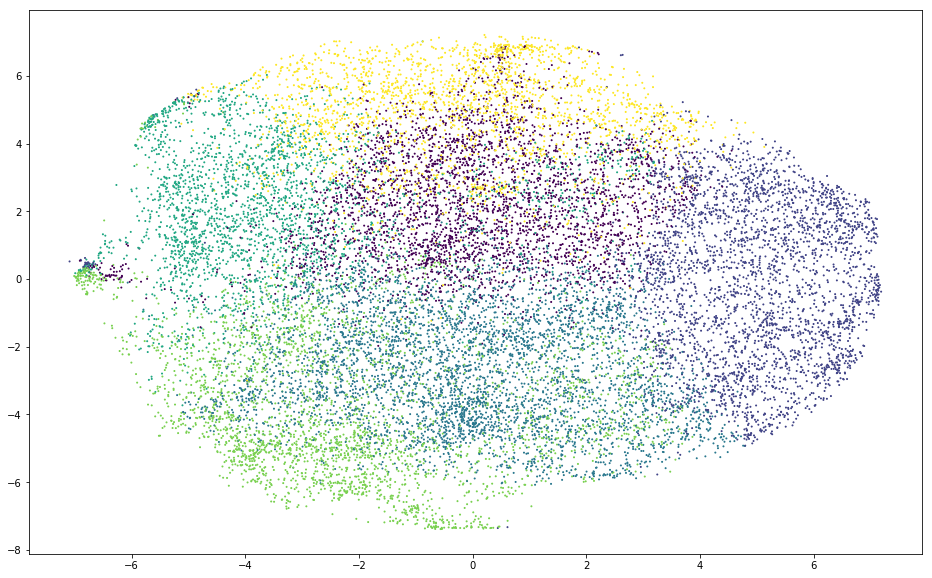

In [123]:
plt.figure(figsize=(16,10))
plt.scatter(tsne_pl_X_var[:, 0], tsne_pl_X_var[:, 1], c=std_pl_X_var_km_y, s=1, cmap='viridis')

In [ ]:
# std_pl_X_var_km_model, std_pl_X_var_km_y, std_pl_X_var_km_centers

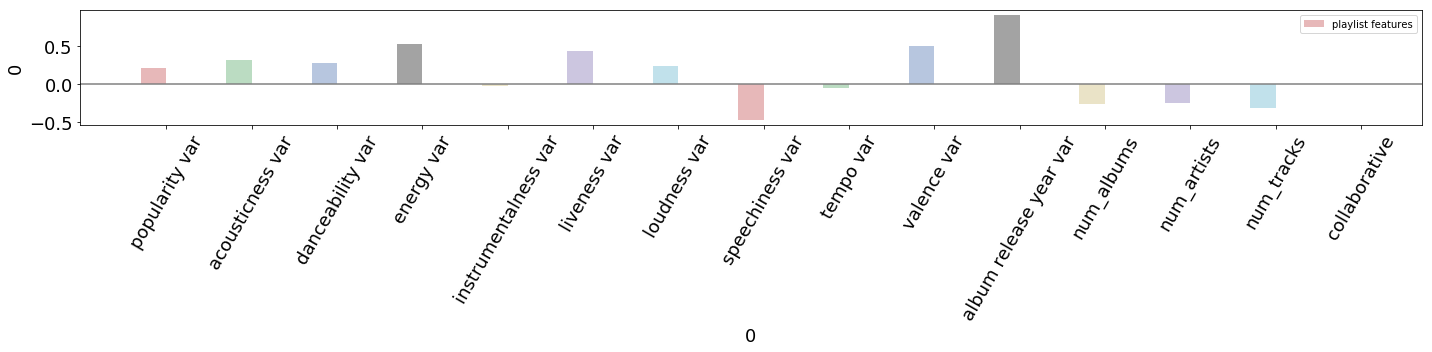

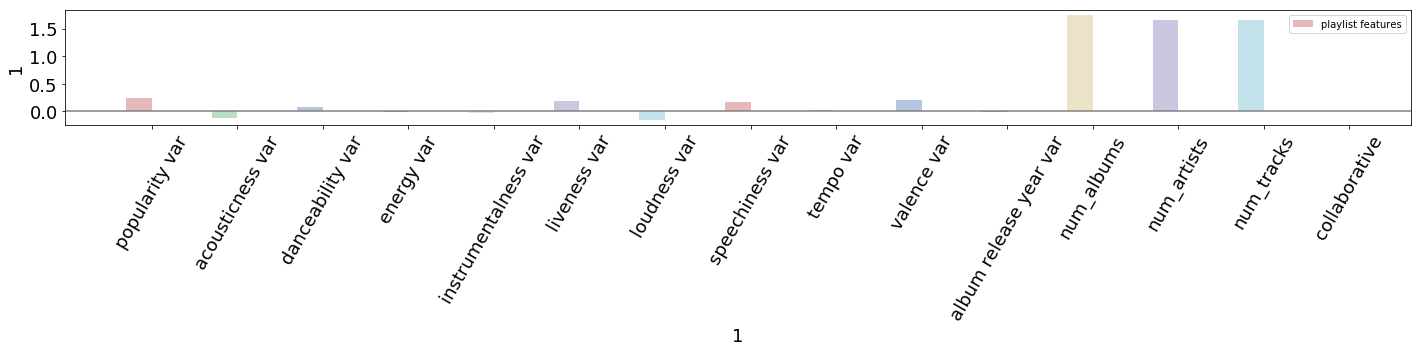

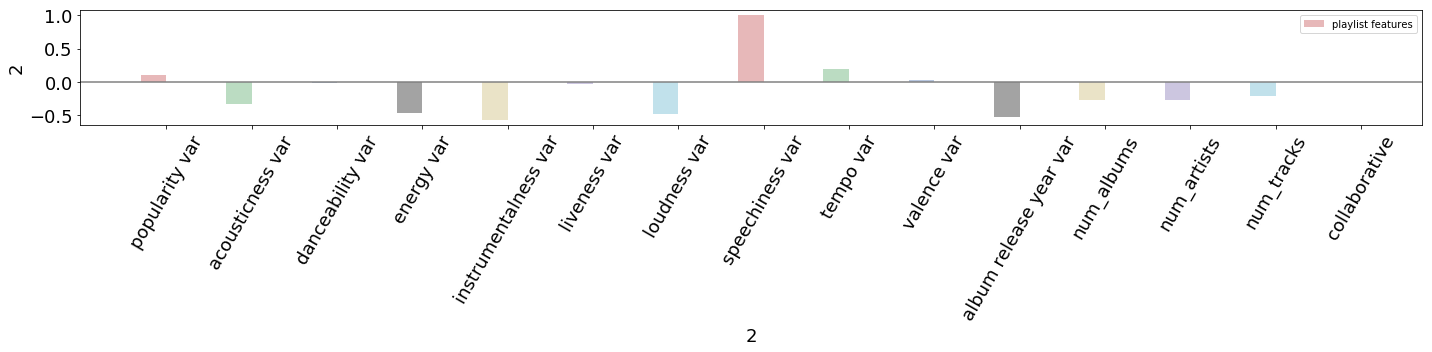

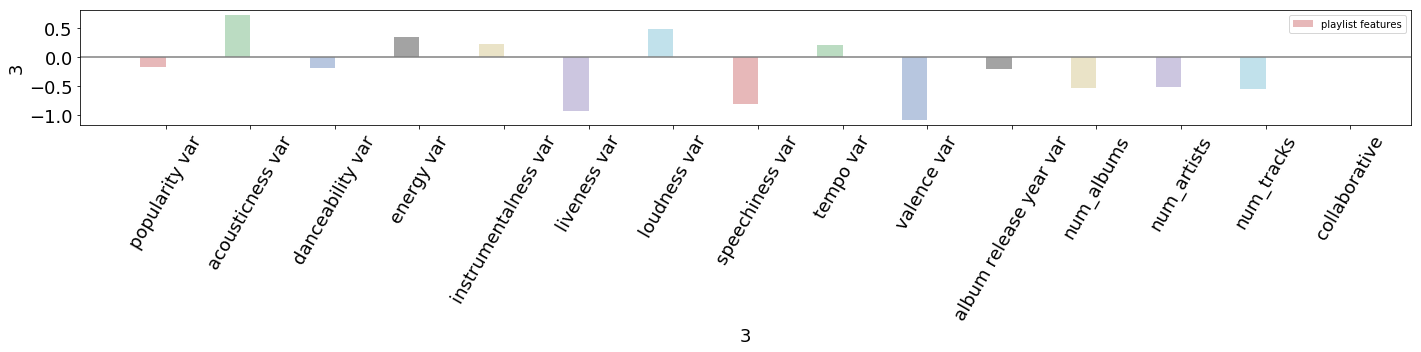

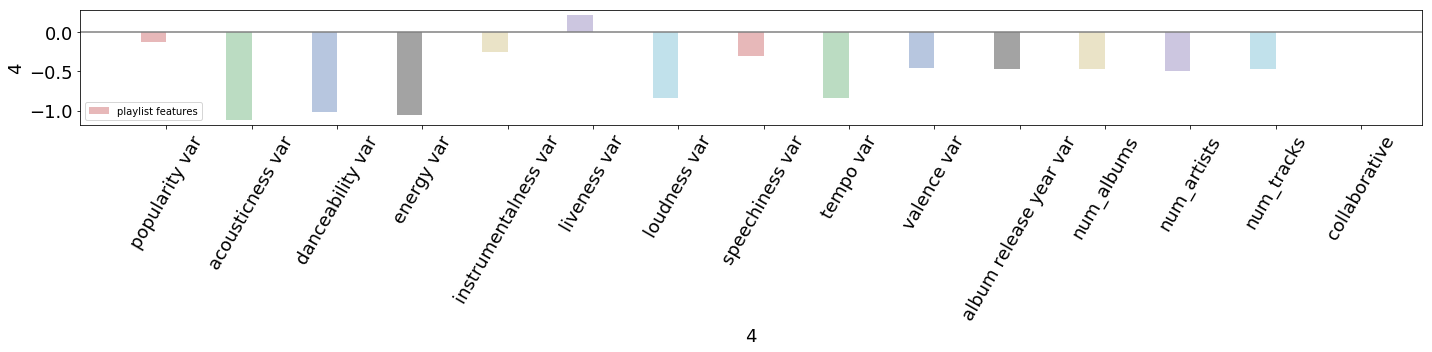

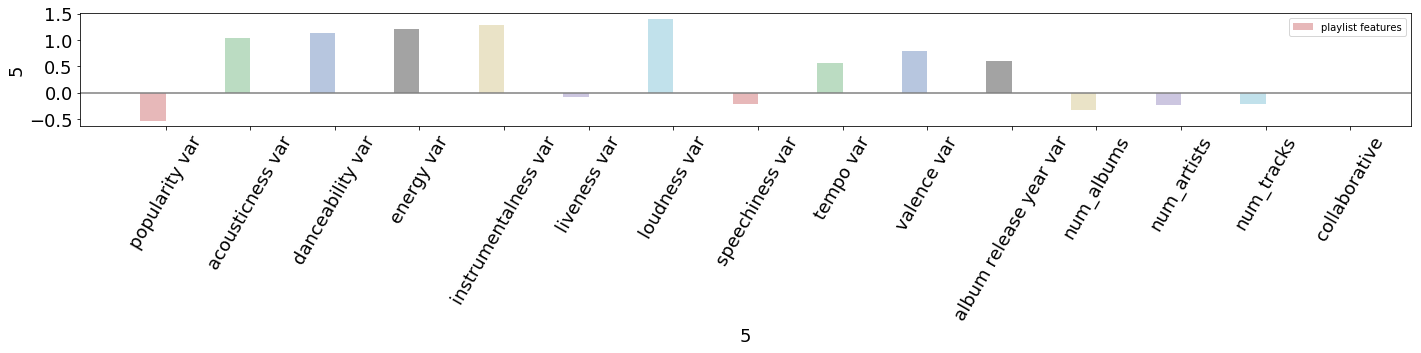

In [136]:
for c_idx in range(len(std_pl_X_var_km_centers)):
    
    x = std_pl_X_var_km_centers[c_idx]
    n_groups = len(feature_name_list[11:])
    
    fig, ax = plt.subplots(figsize=(20, 5))
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(18)

    index = np.arange(n_groups)
    bar_width = 0.30

    opacity = 0.4
    error_config = {'ecolor': '0.3'}

    rects1 = ax.bar(index, x, bar_width,
                    alpha=opacity, color='rgbkymc', 
                    error_kw=error_config,
                    label='playlist features')
    ax.axhline(0, color='gray')

    ax.set_xlabel(str(c_idx))
    ax.set_ylabel(str(c_idx))
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(feature_name_list[11:], rotation=60)
    ax.legend()
    fig.tight_layout()
    plt.savefig('var_' + str(c_idx) + '.png')


In [ ]:

# from datetime import datetime
# import logging
# import pandas as pd
# from pyspark.sql import SparkSession
# from pyspark.sql.window import Window
# from pyspark.sql import HiveContext
# from pyspark.sql import SQLContext
# from pyspark.sql.functions import to_date, col, count, row_number, \
#                                   desc, explode, least, size, coalesce, collect_list, collect_set

# spark = SparkSession.builder.enableHiveSupport().config(
#             "spark.hadoop.avro.mapred.ignore.inputs.without.extension", "false").getOrCreate()
# sc = spark.sparkContext

# sqlContext = SQLContext(sc)
# hiveCtx = HiveContext(sc)

# discogs_tags = sqlContext.read.format("com.databricks.spark.avro").load(
#             "/research/enki/discogs/album_discogs_parsed")
# discogs_tags = discogs_tags.filter("discogs_tag_type = 'genre' or discogs_tag_type='style'").groupBy(
#     "discogs_release_id").agg(collect_set("discogs_tag_name").alias("discogs_genres"))

# enki_discogs = hiveCtx.sql("select dz_id, discogs_id from research.enki_album_deezer_discogs")
# discogs_tags_enki = discogs_tags.join(
#     enki_discogs, discogs_tags.discogs_release_id == enki_discogs.discogs_id).select(
#     "discogs_id", "discogs_genres", "dz_id").withColumnRenamed("dz_id", "album_id")
# import pandas as pd
# msd_to_deezer = pd.read_csv("workspace/enki_track_msd.csv")
# msd_to_deezer
# msd_to_deezer = pd.read_csv("workspace/enki_track_msd.csv", sep="\t")
# msd_to_deezer
# dz_msd_track_df = sqlContext.createDataFrame(sc.parallelize(list(zip(msd_to_deezer["dz_id"], msd_to_deezer["msd_id"]))), ["song_id", "msd_id"])
# songs_table = hiveCtx.sql(
#             "select song_id, album_id from dwh.song")
# msd_track_album_id = dz_msd_track_df.join(songs_table, "song_id")


# def as_dwh_token(d):
#     return d.strftime("%Y%m%d")

# def as_reco_token(d):
#     return d.strftime("%Y-%m-%d")

# def today_table_token():
#     return as_dwh_token(datetime.now())

# album_table = hiveCtx.read.orc(
#         "/hive/dwh.db/album/{}".format(today_table_token())).select(
#             "album_id", "product_album_id")
# discogs_tags_enki = discogs_tags_enki.join(album_table, "album_id")
# msd_track_album_id = msd_track_album_id.join(album_table, "album_id")
# msd_dsg_tags = msd_track_album_id.join(discogs_tags_enki, "product_album_id").cache()

# msd_dsg_tags_df = msd_dsg_tags.select("song.album_id", "discogs_id", "discogs_genres", "song_id", "msd_id").toPandas()
# msd_dsg_tags_df.to_csv("workspace/discogs_tags_msd.csv", index=False)